In [1]:
import pandas as pd  # permite trabalhar com dataframes
import numpy as np   # permite operações com vetores e matrizes
import math          # facilita certas operaçoes matematicas

In [2]:
#definições gerais

#mudar para definir qual indicador será plotado
INDICADOR = 'letalidade'

#paths para os arquivos arquivos
DIST = "imedreg_dist_polos.csv"
MORAN = "imedreg_" + INDICADOR + ".csv"
RESULTADOS = "Mapas//"

# Funções

In [3]:
#retorna o nome do arquivo com  base na semana
def dynamic_name(semana):
    return MORAN[:-4] + '_' + str(semana) + '.csv' 

In [4]:
#retorna posição do vetor em que os elementos se igualam
def posicao_igual(lista, atributo): 
    for i, elemento in enumerate(lista):
        if elemento == atributo: 
            return i

In [5]:
#agrupa ocorrencias iguais de um atributo e calcula o número das ocorrencias
def group_list(lista):
    data_cumul = [[1,1]]
    for data in lista:
        if data not in [el[0] for el in data_cumul]:
            data_cumul.append([data, 1])
        else:
            for el in data_cumul:
                if el[0] == data:
                    el[1] += 1                
    del data_cumul[0]
    return data_cumul

In [6]:
# retorna a posição do elementos igual entre uma lista e um atributo
def posicao_igual(lista, atributo): 
    for i, elemento in enumerate(lista):
        if elemento == atributo: 
            return i

In [7]:
#agrupa ocorrencias iguais de um atributo e calcula o número das ocorrencias
def group_list(lista):
    data_cumul = [[1,1]]
    for data in lista:
        if data not in [el[0] for el in data_cumul]:
            data_cumul.append([data, 1])
        else:
            for el in data_cumul:
                if el[0] == data:
                    el[1] += 1                
    del data_cumul[0]
    return data_cumul

In [8]:
# une listas em uma lista de atributos por elemento (o resultado terá o mesmo tamanho da primeira lista)
def create_database(list1, list2):
    database = []
    if isinstance(list1[0], list):
        list1 = create_database(list1[0], list1[1])
        for i in range(len(list1)):
            database.append([*list1[i], list2[i]])
    else:
        for i in range(len(list1)):
            database.append([list1[i], list2[i]])
    return database

In [9]:
#cria um database con o número de ocorrencias de cada categoria de um atributo selecionado
def count_atribute(lista, atributo, ordem=[], return_order=False):
    num_atributos = len(lista[0])

    if ordem == []:
        ordem = [el[0] for el in group_list([el[atributo] for el in lista])]


    lista_sem_atributo = []
    for row in lista:
        linha = []
        for i in range(num_atributos):
            linha.append(row[i]) if i != atributo else []
        lista_sem_atributo.append(linha)

    #gera a base que sera adicionada
    append_zerado = []
    for i in range(len(ordem)):
        append_zerado.append(0)

    #cria a nova lista
    nova_lista = [[*lista_sem_atributo[0] , *append_zerado]]
    for i in range(len(lista)):
        nova_lista_categorias =  [el[:atributo] for el in nova_lista]

        if lista_sem_atributo[i] not in nova_lista_categorias:
            nova_lista.append([*lista_sem_atributo[i], *append_zerado])
            
            posicao_atributo = posicao_igual(ordem, lista[i][atributo])

            nova_lista[-1][posicao_atributo+atributo] += 1
        
        else:
            posicao_lista = posicao_igual(nova_lista_categorias, lista_sem_atributo[i])
            posicao_atributo = posicao_igual(ordem, lista[i][atributo])

            nova_lista[posicao_lista][posicao_atributo+atributo] += 1

    if return_order: 
        return print(ordem), nova_lista
    else:
        return nova_lista 

# Definições

In [10]:
# Cria uma lista com o Log da população de cada região imediata

moran_df = pd.read_csv('imedreg_I_local.csv')
populacao = moran_df['populacao'].tolist()

In [11]:
#merge.to_csv("merge_1.csv", index=False)

In [12]:
semanas = {202048, 202049, 202050, 202051, 202052, 202053, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111,}
semanas_1 = {202016, 202017, 202018, 202019, 202020, 202021, 202022, 202023, 202024, 202025, 202026, 202027, 202028, 202029, 202030, 202031, 202032}


# Criação dos Dataframes Principais

## Criação das bases para calculos

In [13]:
# cria com todas as regiões para cada semana e o tipo de cluster que elas foram classificadas a cada semana

clusters = []      # tipos de clusters da semana 202048 até 202111
clusters_1 = []    # tipos de clusters da semana 202019 até 202032
regioes = []       # lista com cada região repedita na mesma ordem dos clusters de repetidas 17 vezes


for semana in semanas:
    moran_df = pd.read_csv(dynamic_name(semana))
    clusters = clusters + moran_df['cluster'].tolist()
    
    regioes = regioes + moran_df['imedreg'].to_list()
    
for semana in semanas_1:
    moran_df = pd.read_csv(dynamic_name(semana))
    clusters_1 = clusters_1 + moran_df['cluster'].tolist()

##  202048 / 202111

In [14]:
# contagem de clusters para a segunda metade da pandemia
database = create_database(regioes, clusters)
contagem = count_atribute(database, 1, ordem=[0,1,2,3,4])

#calcula ocorrencia normalizada
for i, reg in enumerate(contagem):
    for j in range(1,len(reg)):
        contagem[i][j] = contagem[i][j]/17


cluster = []    # armazena o tipo predominante de cluster que essa região teve nesse periódo
desvio = []     # armazena o calculo do quão consistentemente essa região teve essa classificação predominante


for i, reg in enumerate(contagem):
    cluster.append(posicao_igual(reg[2:], max(reg[2:])) + 1)
    desvio.append(math.sqrt(sum([pow(max(reg[2:]) - i , 2) for i in reg[2:]])/3))

In [15]:
#cria um dataframe com a contagem dos clusters, o código da região, o cluster predominante e a concentração da classificação
contagem_df = pd.DataFrame(contagem).rename(columns={0:'imed_reg_code', 1:'n_significativo', 2:1, 3:2,4:3, 5:4})
contagem_df['cluster'] = cluster
contagem_df['concentracao'] = desvio
contagem_df

,imed_reg_code,n_significativo,1,2,3,4,cluster,concentracao
0,110001,1.0,0.0,0.0,0.0,0.0,1,0.0
1,110002,1.0,0.0,0.0,0.0,0.0,1,0.0
2,110003,1.0,0.0,0.0,0.0,0.0,1,0.0
3,110004,1.0,0.0,0.0,0.0,0.0,1,0.0
4,110005,1.0,0.0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...
505,520019,1.0,0.0,0.0,0.0,0.0,1,0.0
506,520020,1.0,0.0,0.0,0.0,0.0,1,0.0
507,520021,1.0,0.0,0.0,0.0,0.0,1,0.0
508,520022,1.0,0.0,0.0,0.0,0.0,1,0.0


## 202016 / 202033

In [16]:
# faz o mesmo para a primeira metade da pandemia

database = create_database(regioes, clusters_1)
contagem = count_atribute(database, 1, ordem=[0,1,2,3,4])

for i, reg in enumerate(contagem):
    for j in range(1,len(reg)):
        contagem[i][j] = contagem[i][j]/17
    
cluster = []    
desvio = []
for i, reg in enumerate(contagem):
    cluster.append(posicao_igual(reg[2:], max(reg[2:])) + 1)
    desvio.append(math.sqrt(sum([pow(max(reg[2:]) - i , 2) for i in reg[2:]])/3))

In [17]:
contagem_1_df = pd.DataFrame(contagem).rename(columns={0:'imed_reg_code', 1:'n_significativo', 2:1, 3:2,4:3, 5:4})
contagem_1_df['cluster'] = cluster
contagem_1_df['concentracao'] = desvio
contagem_1_df

,imed_reg_code,n_significativo,1,2,3,4,cluster,concentracao
0,110001,0.823529,0.000000,0.058824,0.117647,0.000000,3,0.101885
1,110002,1.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
2,110003,0.941176,0.000000,0.058824,0.000000,0.000000,2,0.058824
3,110004,1.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
4,110005,1.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...
505,520019,0.882353,0.000000,0.000000,0.117647,0.000000,3,0.117647
506,520020,0.705882,0.058824,0.000000,0.000000,0.235294,4,0.217462
507,520021,0.529412,0.058824,0.000000,0.235294,0.176471,3,0.173172
508,520022,0.941176,0.000000,0.000000,0.058824,0.000000,3,0.058824


# Plotagem de mapas

In [18]:
import geopandas as gpd              # permite trabalhar shapefiles 
import geobr                         # importa shapefiles do brasil
import matplotlib.pyplot as plt      # permite plotar imagens
from matplotlib.patches import Patch # permite fazer legenda das cores
from matplotlib.lines import Line2D  # permite fazer legenda dos pontos

## Preparação das geometrias

In [19]:
#Leitura da geometrias das regiões imediatas e merge com os indicadores
ri_geometry = geobr.read_immediate_region()
ri_geometry = ri_geometry.rename(columns={'code_immediate':'imed_reg_code'})
ri_geometry['imed_reg_code'] = ri_geometry['imed_reg_code'].astype(int)

/home/pedro/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [20]:
#separação das cidades com mais de 1 Milhão de habitantes e suas corrdenadas 
cidades_1M = ri_geometry
cidades_1M['pop'] = populacao

#Cria uma nova coluna com as coordenadas do ponto representativo de cada cidade
cidades_1M['coords'] = cidades_1M['geometry'].apply(lambda x: x.representative_point().coords[:])
cidades_1M['coords'] = [coords[0] for coords in cidades_1M['coords']]


cidades_1M = cidades_1M[cidades_1M['pop'] > 1000000]



In [21]:
# separa a geometria dos estados brasileiros

# le a geometria
geometry_states = geobr.read_state()

#Cria uma cópia do dataframe para não persistir nenhuma alteração
geometry_states = gpd.GeoDataFrame(geometry_states)

#Cria uma nova coluna com as coordenadas do ponto representativo de cada estado (casos queiramos colocar o nome de cada estado)
geometry_states['coords'] = geometry_states['geometry'].apply(lambda x: x.representative_point().coords[:])
geometry_states['coords'] = [coords[0] for coords in geometry_states['coords']]

states_geo = gpd.GeoDataFrame(geometry_states)

/home/pedro/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


## Calculo das cores de cada região imediata com base no seu cluster predominante

In [22]:
# adiciona a geometria com cada região às bases
contagem_geo = pd.merge(ri_geometry, contagem_df)
contagem_1_geo = pd.merge(ri_geometry, contagem_1_df)

#define as cores em rgb (para matplotlib) para cada tipo de cluster
cores = [[215/255, 25/255, 28/255], [253/255, 174/255, 97/255], [44/255, 123/255, 182/255], [138/255, 255/255, 132/255]]

#cria uma matriz onde serão preenchidas as cores cores para cada região imediata
rgb_cores = np.zeros((len(contagem),4))
rgb_1_cores = np.zeros((len(contagem),4))


# Armazena o valor máximo que o alpha pode assumir para cada um, será usado para a normalização da coloração
maxi = 0


for i, row in contagem_geo.iterrows():
    cluster = row['cluster']
    alpha =  math.sqrt(row['concentracao'] * row[cluster])/1.25 + 0.2  
    if alpha > maxi:
        maxi = alpha
        
for i, row in contagem_1_geo.iterrows():
    cluster = row['cluster']
    alpha =  math.sqrt(row['concentracao'] * row[cluster])/1.25 + 0.2  
    
    if alpha > maxi:
        maxi = alpha
     
    

#calcula a cor para cada região em cada plotagem
for i, row in contagem_geo.iterrows():
    
    cluster = row['cluster']
    alpha =  math.sqrt(row['concentracao'] * row[cluster])/1.25 + 0.2  
    if alpha == 0.2 or cluster not in [1,3]:
            rgb_cores[i] = [0.6, 0.6, 0.6, 1]
    else:
        rgb_cores[i] = [*cores[cluster - 1], alpha/maxi] 

        
for i, row in contagem_1_geo.iterrows():
    
    cluster = row['cluster']
    alpha =  math.sqrt(row['concentracao'] * row[cluster])/1.25 + 0.2  
    if alpha == 0.2 or cluster not in [1,3]:
            rgb_1_cores[i] = [0.6, 0.6, 0.6, 1]
    else:
        rgb_1_cores[i] = [*cores[cluster - 1], alpha/maxi] 
        



In [23]:
## Plotagem dos mapas

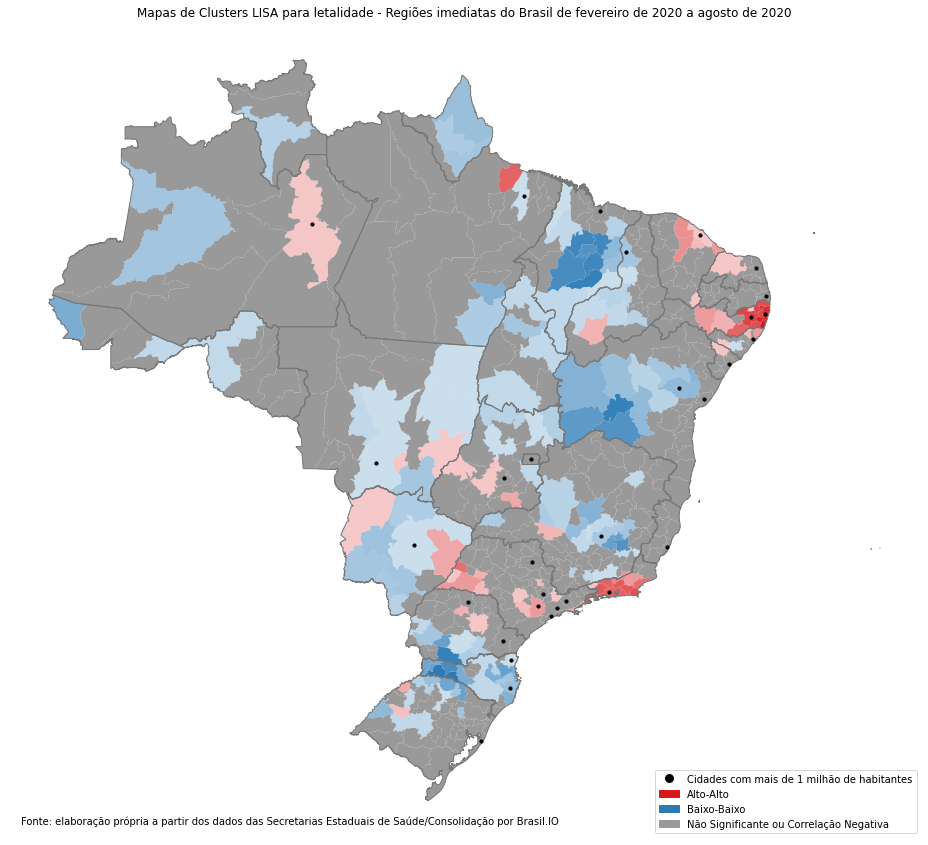

In [24]:
# plota mapa para a primeira metade da pandemia

fig, ax = plt.subplots(figsize = (20,15))

# plota regiões imediatas
contagem_1_geo.geometry.plot(color=rgb_1_cores, edgecolor=None, linewidth=0.5, ax=ax)

# plota divisão dos estados
states_geo.geometry.boundary.plot(color=None,edgecolor='#777777', linewidth = 1,ax=ax)

# plota cidades com mais de 1 milhão habitantes
xs=[coordenada[0] for coordenada in cidades_1M['coords']]
ys=[coordenada[1] for coordenada in cidades_1M['coords']]
scatter = ax.scatter(xs, ys, 10, marker='o', color="#000000", zorder=3)

#cria legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cidades com mais de 1 milhão de habitantes',
                          markerfacecolor='k', markersize=10),
                   Patch(facecolor=[215/255, 25/255, 28/255,1], edgecolor=[215/255, 25/255, 28/255,1],
                         label='Alto-Alto'),
                   Patch(facecolor=[44/255, 123/255, 182/255,1], edgecolor=[44/255, 123/255, 182/255,1],
                         label='Baixo-Baixo'),
                   Patch(facecolor=[0.6, 0.6, 0.6, 1], edgecolor=[0.6, 0.6, 0.6, 1],
                         label='Não Significante ou Correlação Negativa')
                  ]
ax.legend(handles=legend_elements, loc=4)

# nomeia e salva
plt.title('Mapas de Clusters LISA para ' + INDICADOR + ' - Regiões imediatas do Brasil de fevereiro de 2020 a agosto de 2020')
plt.axis('off')
fonte = "Fonte: elaboração própria a partir dos dados das Secretarias Estaduais de Saúde/Consolidação por Brasil.IO"
plt.text( -75.5,-35, fonte, bbox=dict(fill=False, edgecolor=None, linewidth=0))
plt.savefig(RESULTADOS + 'clusters_de_'+ INDICADOR + '_16_33.png', facecolor='w', dpi=120)    
plt.show()

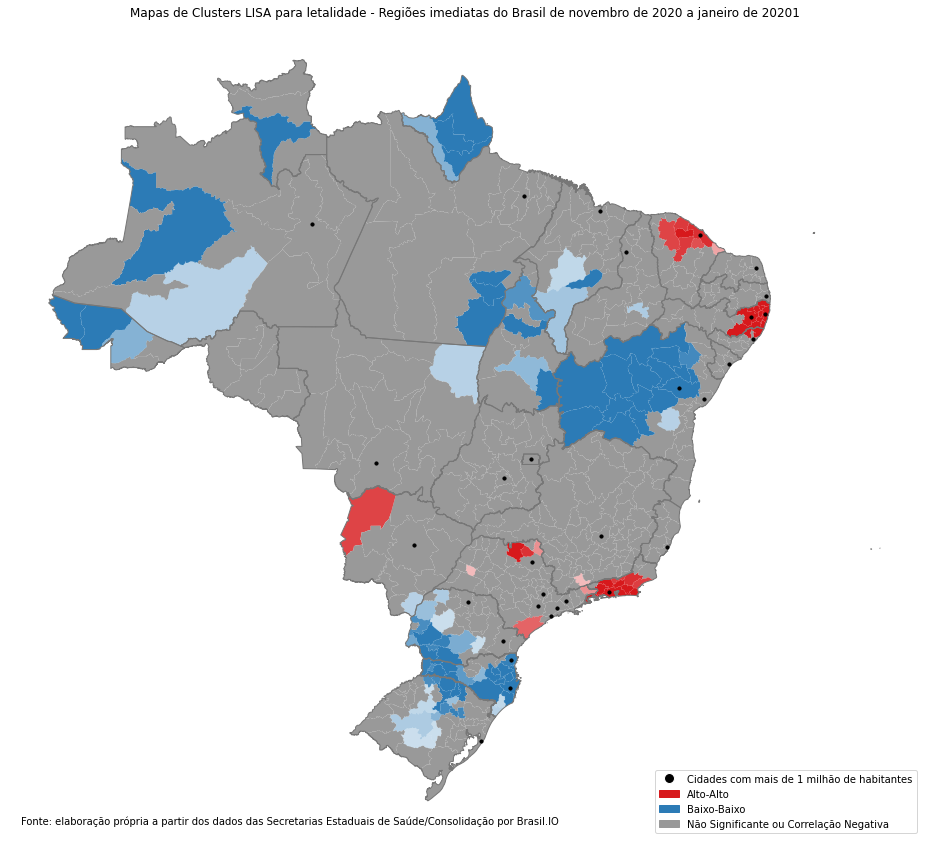

In [25]:
# plota mapas para a segunda metade da pandemia

fig, ax = plt.subplots(figsize = (20,15))

# plota as regiões imediatas
contagem_geo.geometry.plot(color=rgb_cores, edgecolor=None, linewidth=0.5, ax=ax)

# plota a divisão dos estados
states_geo.geometry.boundary.plot(color=None,edgecolor='#777777', linewidth = 1,ax=ax)

# plota cidades com mais de 1 milhão de habitantes
xs=[coordenada[0] for coordenada in cidades_1M['coords']]
ys=[coordenada[1] for coordenada in cidades_1M['coords']]
scatter = ax.scatter(xs, ys, 10, marker='o', color="#000000", zorder=3)

#cria legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cidades com mais de 1 milhão de habitantes',
                          markerfacecolor='k', markersize=10),
                   Patch(facecolor=[215/255, 25/255, 28/255,1], edgecolor=[215/255, 25/255, 28/255,1],
                         label='Alto-Alto'),
                   Patch(facecolor=[44/255, 123/255, 182/255,1], edgecolor=[44/255, 123/255, 182/255,1],
                         label='Baixo-Baixo'),
                   Patch(facecolor=[0.6, 0.6, 0.6, 1], edgecolor=[0.6, 0.6, 0.6, 1],
                         label='Não Significante ou Correlação Negativa')
                  ]
ax.legend(handles=legend_elements, loc=4)

#nomeia e salva
plt.title('Mapas de Clusters LISA para ' + INDICADOR + ' - Regiões imediatas do Brasil de novembro de 2020 a janeiro de 20201')
plt.axis('off')
fonte = "Fonte: elaboração própria a partir dos dados das Secretarias Estaduais de Saúde/Consolidação por Brasil.IO"
plt.text( -75.5,-35, fonte, bbox=dict(fill=False, edgecolor=None, linewidth=0))
plt.savefig(RESULTADOS + 'clusters_de_'+ INDICADOR + '_48_11.png', facecolor='w', dpi=120)    
plt.show()

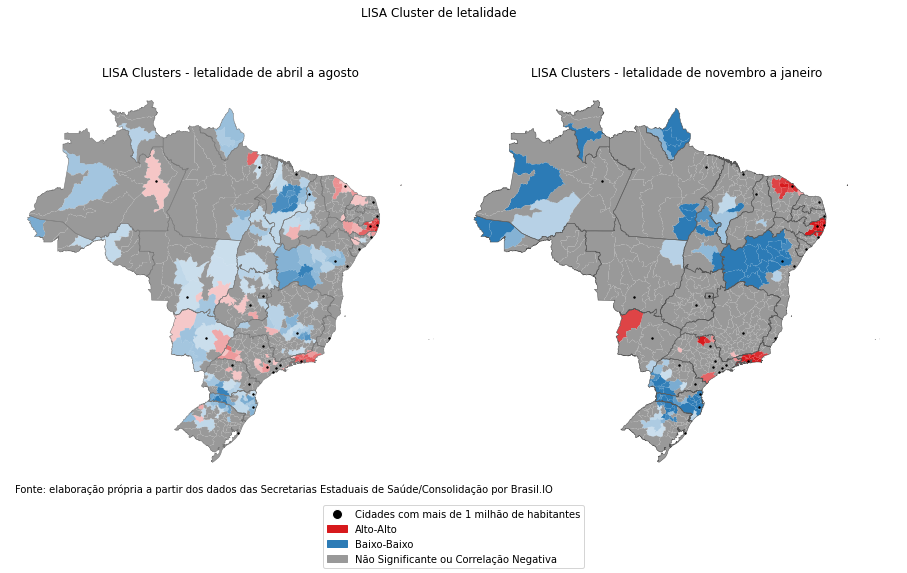

In [26]:
#plota mapas para toda a pandemia

#cria dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))

#plota a primeira metade
contagem_1_geo.geometry.plot(color=rgb_1_cores, edgecolor=None, ax=ax1)

states_geo.geometry.boundary.plot(color=None,edgecolor='#777777', linewidth = 0.5,ax=ax1)

xs=[coordenada[0] for coordenada in cidades_1M['coords']]
ys=[coordenada[1] for coordenada in cidades_1M['coords']]
scatter = ax1.scatter(xs, ys, 2, marker='o', color="#000000", zorder=3)

ax1.set_title('LISA Clusters - ' + INDICADOR + ' de abril a agosto')
ax1.axis('off')

#plota a segunda metade
contagem_geo.geometry.plot(color=rgb_cores, edgecolor=None, ax=ax2)

states_geo.geometry.boundary.plot(color=None,edgecolor='#555555', linewidth = 0.5,ax=ax2)

xs=[coordenada[0] for coordenada in cidades_1M['coords']]
ys=[coordenada[1] for coordenada in cidades_1M['coords']]
scatter = ax2.scatter(xs, ys, 2, marker='o', color="#000000", zorder=3)
    
ax2.set_title('LISA Clusters - ' + INDICADOR + ' de novembro a janeiro')
ax2.axis('off')
    
#cria legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cidades com mais de 1 milhão de habitantes',
                          markerfacecolor='k', markersize=10),
                   Patch(facecolor=[215/255, 25/255, 28/255,1], edgecolor=[215/255, 25/255, 28/255,1],
                         label='Alto-Alto'),
                   Patch(facecolor=[44/255, 123/255, 182/255,1], edgecolor=[44/255, 123/255, 182/255,1],
                         label='Baixo-Baixo'),
                   Patch(facecolor=[0.6, 0.6, 0.6, 1], edgecolor=[0.6, 0.6, 0.6, 1],
                         label='Não Significante ou Correlação Negativa')
                  ]
fig.legend(handles=legend_elements, loc=8)
    

#salva e cria titulo
fig.suptitle('LISA Cluster de ' + INDICADOR)
plt.subplots_adjust(wspace=0)
fonte = "Fonte: elaboração própria a partir dos dados das Secretarias Estaduais de Saúde/Consolidação por Brasil.IO"
plt.text( -125,-37, fonte, bbox=dict(fill=False, edgecolor=None, linewidth=0))
plt.savefig(RESULTADOS + 'clusters_de_' + INDICADOR + '.png', facecolor='w')        
plt.show()

